In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotnine as pn

In [137]:
def import_vsweep(fpath="schematic/data/final/dac7_LDS_Vout-", num1=63, num2=9):
    list_df = []
    list_perchange = []
    percent = []
    for j in range(num1):
        for i in range(num2):
            df_tmp = pd.read_csv(fpath+str(j+1)+'-'+str(i+1)+".txt", delimiter="\s+")

            # Turn bits into binary
            df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
            df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
            df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
            df_tmp["v(b3)"] = (df_tmp["v(b3)"] > 1e-3).astype(float)
            df_tmp["v(b4)"] = (df_tmp["v(b4)"] > 1e-3).astype(float)
            df_tmp["v(b5)"] = (df_tmp["v(b5)"] > 1e-3).astype(float)
            df_tmp["v(b6)"] = (df_tmp["v(b6)"] > 1e-3).astype(float)
            df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))*i
            df_tmp["lsb"] = df_tmp["i(vbias)"]/96

            # Calculate Percent change at 80%
            percent80 = df_tmp[df_tmp["v-sweep"]==1.44]
            percent0 = df_tmp[df_tmp["v-sweep"]==0]
            per_change = (abs(percent0["i(viout)"].values - percent80["i(viout)"].values)/percent0["i(viout)"].values)/(percent80["v-sweep"].values - percent0["v-sweep"].values)
            list_perchange.append(per_change)

            percent.append({'digital_input': j+1, 
                            'run': i+1, 
                            'percent_change':per_change[0]*100})
            
            df_tmp["diff"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))
        #     df_tmp["inl"] = df_tmp["dnl"].cumsum()
            list_df.append(df_tmp)
    return pd.concat(list_df).reset_index(drop=True), np.array(list_perchange)*100, percent

In [140]:
my_df, my_per, percents_list = import_vsweep(fpath="schematic/data/final/dac7_LDS_Vout-", num1=127, num2=8)
my_df["src"] = my_df["src"].astype("str")
my_df.head()

,v-sweep,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),src,lsb,diff
0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561097e-07,1.514653e-09,0.00,0.0,1.626143e-09,1.626143e-09
1,0.01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561097e-07,1.514245e-09,0.01,0.0,1.626143e-09,-4.080500e-13
2,0.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561097e-07,1.513846e-09,0.02,0.0,1.626143e-09,-3.990100e-13
3,0.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561097e-07,1.513403e-09,0.03,0.0,1.626143e-09,-4.432100e-13
4,0.04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561097e-07,1.513036e-09,0.04,0.0,1.626143e-09,-3.661500e-13


In [141]:
percents_list

[{'digital_input': 1, 'run': 1, 'percent_change': 1.06085507157181},
 {'digital_input': 1, 'run': 2, 'percent_change': 1.0970230187858792},
 {'digital_input': 1, 'run': 3, 'percent_change': 1.046592057701349},
 {'digital_input': 1, 'run': 4, 'percent_change': 0.9376905199822955},
 {'digital_input': 1, 'run': 5, 'percent_change': 1.0449821839669113},
 {'digital_input': 1, 'run': 6, 'percent_change': 1.0625654147913062},
 {'digital_input': 1, 'run': 7, 'percent_change': 0.9615337036936419},
 {'digital_input': 1, 'run': 8, 'percent_change': 0.9921506067560808},
 {'digital_input': 2, 'run': 1, 'percent_change': 0.4750717803408124},
 {'digital_input': 2, 'run': 2, 'percent_change': 0.5307279782634398},
 {'digital_input': 2, 'run': 3, 'percent_change': 0.4676995113037715},
 {'digital_input': 2, 'run': 4, 'percent_change': 0.4187814075166937},
 {'digital_input': 2, 'run': 5, 'percent_change': 0.48799984588652573},
 {'digital_input': 2, 'run': 6, 'percent_change': 0.5357272449592965},
 {'digit

In [142]:
"""fig, ax = plt.subplots()
ax.plot(my_df["v-sweep"], my_df["i(viout)"], "bo", alpha=0.5)
ax.set_title("$I_{out}$ While Sweeping $V_{out}$")
ax.set_xlabel("$V_{out}$ [V]")
ax.set_ylabel("$I_{out}$ [A]")"""

'fig, ax = plt.subplots()\nax.plot(my_df["v-sweep"], my_df["i(viout)"], "bo", alpha=0.5)\nax.set_title("$I_{out}$ While Sweeping $V_{out}$")\nax.set_xlabel("$V_{out}$ [V]")\nax.set_ylabel("$I_{out}$ [A]")'

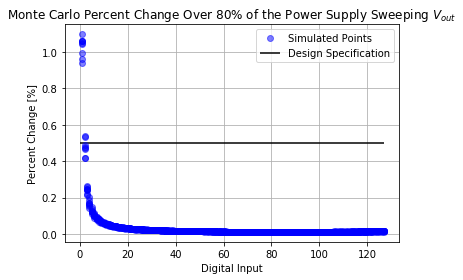

In [143]:
fig, ax = plt.subplots()

max_bit_input = 127

ax.plot(percents_list[0]['digital_input'], percents_list[0]['percent_change'], "bo", label = 'Simulated Points', alpha=0.5)

for i in range(len(percents_list)):
    ax.plot(percents_list[i]['digital_input'], percents_list[i]['percent_change'], "bo", alpha=0.5)
    
ax.set_title("Monte Carlo Percent Change Over 80% of the Power Supply Sweeping $V_{out}$")
ax.set_xlabel("Digital Input")
ax.set_ylabel("Percent Change [%]")
plt.grid(1)
plt.hlines(0.5, 0, max_bit_input, label = "Design Specification")
ax.legend()

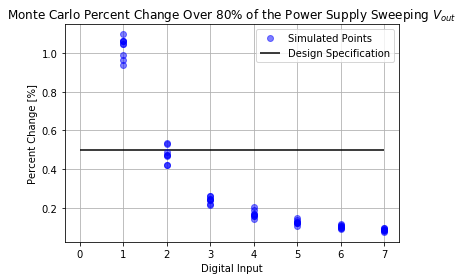

In [144]:
fig, ax = plt.subplots()

max_bit_input = 7

ax.plot(percents_list[0]['digital_input'], percents_list[0]['percent_change'], "bo", label = 'Simulated Points', alpha=0.5)

for i in range(len(percents_list)):
    if(percents_list[i]['digital_input'] <= max_bit_input):
        ax.plot(percents_list[i]['digital_input'], percents_list[i]['percent_change'], "bo", alpha=0.5)
    
ax.set_title("Monte Carlo Percent Change Over 80% of the Power Supply Sweeping $V_{out}$")
ax.set_xlabel("Digital Input")
ax.set_ylabel("Percent Change [%]")
plt.grid(1)
plt.hlines(0.5, 0, max_bit_input, label = "Design Specification")
ax.legend()

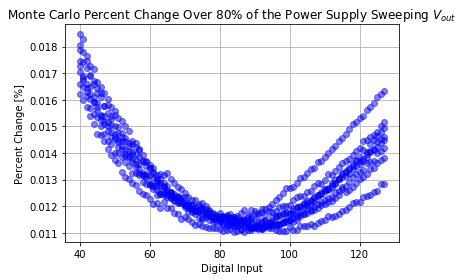

In [145]:
fig, ax = plt.subplots()

min_bit_input = 40

#ax.plot(percents_list[0]['digital_input'], percents_list[0]['percent_change'], "bo", label = 'Simulated Points', alpha=0.5)

for i in range(len(percents_list)):
    if(percents_list[i]['digital_input'] >= min_bit_input):
        ax.plot(percents_list[i]['digital_input'], percents_list[i]['percent_change'], "bo", alpha=0.5)
    
ax.set_title("Monte Carlo Percent Change Over 80% of the Power Supply Sweeping $V_{out}$")
ax.set_xlabel("Digital Input")
ax.set_ylabel("Percent Change [%]")
plt.grid(1)